Introduction to the Spotify Musical Popularity Prediction System.

Business Understanding:

Many music related businesses and services, including record labels (Rough Trade, EMI, Matador, etc.), music reviewing publications (Pitchfork, Stereogum, Consequence of sound, etc.), radio stations (KEXP, NPR, The Current, KCRW, etc.), rely on music curation and playlist creation, as a means to establish their presence or artists presence in their respective music scene. A music related company that delivers popular playlists with songs that appeal to a broad range of listeners is more likely to succeed than a music related company that does not. I am looking to see if it is possible to create a music recommendation system, to help these businesses choose the best songs/sounds/genres to apply to their playlists to achieve maximum visibility and exposure, either to their publications. Radio stations, and record labels/artists

In [78]:
#Imports (Will import neccessary packages as the progress progresses)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data Importing and Basic Analysis

In [2]:
#Importing spotify data set found from Kaggle, which contains over 230,000 songs, along with their attributes.

df = pd.read_csv('SpotifyFeatures.csv')
df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
#viewing the individual statistics of each column in the data set
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
#Viewing the data with their categorical and numerical information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
#Viewing the various values contained within each of the columns
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("--------------------")


Column: genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64
--------------------
Column: artist_name
Giuseppe Verdi            1394
Giacomo Puccini           1137
Kimbo Children's Music     971
Nobuo Uematsu              825
Richard Wagner             804
                          ... 
Nelson Rangell               1
The Orwells                

In [6]:
#Above, I found some things that will need to be considered when doing my analysis and modeling.
#There is duplicative information in the dataset, one of them is the genre "Children's Music", and another is the duplicated values in the track_id column

DATA CLEANING: SCRUBBING

In [7]:
#The first bit of cleaning that I will be doing will be in regard to the duplicative "Children's Music" genre.As seen in the below code and output:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [8]:
#Since we have 2 different genres called "Children's Music", I am going to have to merge them both together so that the data can be consistent
df.loc[df['genre']=="Children’s Music",'genre']="Children's Music"

In [9]:
#Double Checking to make sure the merge has successfully occurred
df['genre'].value_counts()

Children's Music    14756
Comedy               9681
Soundtrack           9646
Indie                9543
Jazz                 9441
Pop                  9386
Electronic           9377
Folk                 9299
Hip-Hop              9295
Rock                 9272
Alternative          9263
Classical            9256
Rap                  9232
World                9096
Soul                 9089
Blues                9023
R&B                  8992
Anime                8936
Reggaeton            8927
Ska                  8874
Reggae               8771
Dance                8701
Country              8664
Opera                8280
Movie                7806
A Capella             119
Name: genre, dtype: int64

In [10]:
#Now that I have merged the duplicative genres together, I am going to check for Missing Values
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [11]:
#Since there are no missing values, I will be moving on to the other issue, which is the duplicated tracks portion.
df[df['track_id'].duplicated()]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.07160,0.710,217813,0.710,0.000001,C,0.2060,-2.474,Major,0.0579,169.944,4/4,0.700
1385,Alternative,Frank Ocean,Seigfried,1BViPjTT585XAhkUUrkts0,61,0.97500,0.377,334570,0.255,0.000208,E,0.1020,-11.165,Minor,0.0387,125.004,5/4,0.370
1452,Alternative,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,56,0.77900,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.130
1554,Alternative,Steve Lacy,Some,4riDfclV7kPDT9D58FpmHd,58,0.00548,0.784,118393,0.554,0.254000,G,0.0995,-6.417,Major,0.0300,104.010,4/4,0.634
1634,Alternative,tobi lou,Buff Baby,1F1QmI8TMHir9SUFrooq5F,59,0.19000,0.736,215385,0.643,0.000000,F,0.1060,-8.636,Major,0.0461,156.002,4/4,0.599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232715,Soul,Emily King,Down,5cA0vB8c9FMOVDWyJHgf26,42,0.55000,0.394,281853,0.346,0.000002,E,0.1290,-13.617,Major,0.0635,90.831,4/4,0.436
232718,Soul,Muddy Waters,I Just Want To Make Love To You - Electric Mud...,2HFczeynfKGiM9KF2z2K7K,43,0.01360,0.294,258267,0.739,0.004820,C,0.1380,-7.167,Major,0.0434,176.402,4/4,0.945
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813


In [12]:
#As seen above, there is 55,951 duplicative rows of data. Before I fix this, I will need to look at the cause of the duplication.
#I start by checking rows for duplicated ids to see differences. I will do this for a few different tracks for consistency purposes.
df[df['track_id']=='2pMPWE7PJH1PizfgGRMnR9'] 

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
277,R&B,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,61,0.779,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.13
1452,Alternative,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,56,0.779,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.13
68864,Hip-Hop,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,61,0.779,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.13
77707,Children's Music,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,61,0.779,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.13
192203,Soul,Frank Ocean,Bad Religion,2pMPWE7PJH1PizfgGRMnR9,61,0.779,0.276,175453,0.358,0.000003,A,0.0728,-7.684,Major,0.0443,81.977,4/4,0.13


In [13]:
df[df['track_id']=='2XGLdVl7lGeq8ksM6Al7jT']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
179212,Jazz,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962


In [14]:
#As seen in the two different code blocks, most of the attributes for the songs with duplicative values are consistent, with the exception of the values 'popularity' and 'genre'
#To combat this issue, I researched that the best way was to create different columns with genre names, and having binary values represent whether or not certain songs belong in a certain genre. 


In [15]:
#Step one in this process is creating a list with the genre names
genre_list = list(df['genre'].unique())

In [16]:
#Next is creating the genre columns using this new genre list
for genre in genre_list:
    df[genre] = (df['genre']==genre).astype('int')

In [17]:
#Next is grouping each of the tracks by track_id to cleanse the dataset of duplicates, and ensure that the maximum values stay the same in each of the columns.
df=df.groupby(['track_id']).max()

In [18]:
#as seen in the above set of code, I have created the genre column and merged the duplicated values, and making sure we keep the max value in each column for clarity sake, as well as data integrity sake.
#I will be removing the redundant genre column now to avoid any confusion with the new one.
df.drop('genre', axis=1, inplace=True)
df.head()


,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
track_id,,,,,,,,,,,,,,,,,,,,,
00021Wy6AyMbLP2tqij86e,Capcom Sound Team,Zangief's Theme,13,0.234,0.617,169173,0.862,0.976000,G,0.1410,...,0,0,0,0,0,0,0,0,0,0
000CzNKC8PEt1yC3L8dqwV,Henri Salvador,Coeur Brisé à Prendre - Remastered,5,0.249,0.518,130653,0.805,0.000000,F,0.3330,...,0,0,0,0,0,0,0,0,0,0
000DfZJww8KiixTKuk9usJ,Mike Love,Earthlings,30,0.366,0.631,357573,0.513,0.000004,D,0.1090,...,0,1,0,0,0,0,0,0,0,0
000EWWBkYaREzsBplYjUag,Don Philippe,Fewerdolr,39,0.815,0.768,104924,0.137,0.922000,C#,0.1130,...,0,0,0,1,0,0,0,0,0,0
000xQL6tZNLJzIrtIgxqSl,ZAYN,Still Got Time,70,0.131,0.748,188491,0.627,0.000000,G,0.0852,...,1,0,0,0,0,0,0,0,0,0


In [19]:
#Making sure that the duplicates have been erased
df[df.index =='2pMPWE7PJH1PizfgGRMnR9']

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
track_id,,,,,,,,,,,,,,,,,,,,,
2pMPWE7PJH1PizfgGRMnR9,Frank Ocean,Bad Religion,61,0.779,0.276,175453,0.358,0.000003,A,0.0728,...,0,0,0,0,0,0,0,1,0,0


In [20]:
#As seen above, all the duplicates have now been erased, leaving just one track
#Now I am going to check to see how many unique tracks are in the dataset, and if it was narrowed down by my data cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176774 entries, 00021Wy6AyMbLP2tqij86e to 7zzbfi8fvHe6hm342GcNYl
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       176774 non-null  object 
 1   track_name        176774 non-null  object 
 2   popularity        176774 non-null  int64  
 3   acousticness      176774 non-null  float64
 4   danceability      176774 non-null  float64
 5   duration_ms       176774 non-null  int64  
 6   energy            176774 non-null  float64
 7   instrumentalness  176774 non-null  float64
 8   key               176774 non-null  object 
 9   liveness          176774 non-null  float64
 10  loudness          176774 non-null  float64
 11  mode              176774 non-null  object 
 12  speechiness       176774 non-null  float64
 13  tempo             176774 non-null  float64
 14  time_signature    176774 non-null  object 
 15  valence           176774 non-null  f

In [21]:
#As opposed to the earlier number of tracks (232,725), we now have 176,774 tracks in the dataset!

PART 3: FEATURE ENGINEERING
The reason for undertaking this business problem, is to ultimately see what songs will be popular.
Based off of what we learned in class, the easiest way to go about doing this will be to feature engineer a new column by binarizing the popularity column.

To do this, I will have to determine an appropriate max popularity score, that will serve as the cut off point for songs and their ability to be seen as popular.

The easiest way to do this, is by looking at the distribution of the popularity score.

<AxesSubplot:xlabel='popularity', ylabel='Count'>

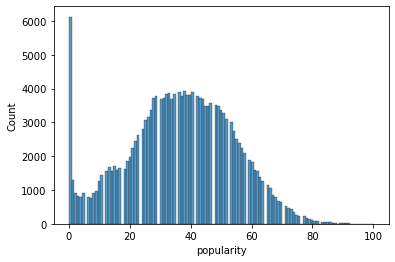

In [22]:
#I will show a histogram that displays the distribution of popularity scores within the dataset.
sns.histplot(df['popularity'], bins='auto')

In [23]:
#Based off of what we learned in class, the above chart shows a bimodial distribution. 
#In order to narrow down the amount of songs to determine what song might be considered popular, I am going to use a data set from Kaggle that shows the top 100 songs of 2019
df_100 = pd.read_csv('spotify_top_100_2019.csv')

df_100.head()

,title,artist,top genre,year,bpm,energy,danceability,loudness,liveness,valence,duration_s,acousticness,speechiness,popularity
0,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,88
1,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86
2,goosebumps,Travis Scott,rap,2016,130,73,84,-3,15,43,244,8,5,86
3,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,86
4,Closer (feat. Halsey),The Chainsmokers,electropop,2016,95,52,75,-6,11,66,245,41,3,85


In [24]:
#Now I am going to view statisticvs for this dataset
df_100['popularity '].describe()

count    100.000000
mean      72.020000
std       14.088451
min        4.000000
25%       70.000000
50%       74.500000
75%       79.000000
max       88.000000
Name: popularity , dtype: float64

<AxesSubplot:xlabel='popularity ', ylabel='Count'>

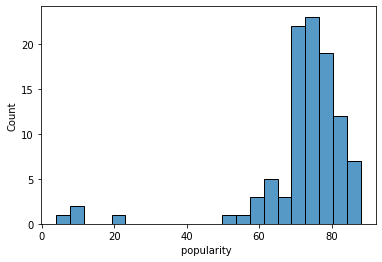

In [25]:
#Next, I will view this information on a histogram to view the spread of popularity scores
fig, ax = plt.subplots()
sns.histplot(df_100['popularity '], bins='auto', ax=ax)

In [26]:
#This histogram shows some pretty heavy outliers, particularly from the first lower quartile.
#In my research, I learned that I can get rid of the outliers by using an IQR method. 
#I am leveraging the following IQR code from an IQR example found online.
def find_outliers_IQR(data):
    """Use Tukey's Method of outlier removal AKA InterQuartile-Range Rule
    and return boolean series where True indicates it is an outlier.
    - Calculates the range between the 75% and 25% quartiles
    - Outliers fall outside upper and lower limits, using a treshold of  1.5*IQR the 75% and 25% quartiles.

    IQR Range Calculation:    
        res = df.describe()
        IQR = res['75%'] -  res['25%']
        lower_limit = res['25%'] - 1.5*IQR
        upper_limit = res['75%'] + 1.5*IQR

    Args:
        data (Series,or ndarray): data to test for outliers.

    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.
        
    EXAMPLE USE: 
    >> idx_outs = find_outliers_df(df['AdjustedCompensation'])
    >> good_data = df[~idx_outs].copy()
    
    
    
    """
    df_b=data
    res= df_b.describe()

    IQR = res['75%'] -  res['25%']
    lower_limit = res['25%'] - 1.5*IQR
    upper_limit = res['75%'] + 1.5*IQR

    idx_outs = (df_b>upper_limit) | (df_b<lower_limit)

    return idx_outs

In [27]:
#With this code input, I will now remove the outliers from the popularity column
df_100 = df_100[find_outliers_IQR(df_100['popularity '])==False]
#displaying minimum & maxium values in popularity column 
print("Minimum:", df_100['popularity '].min())
print("Maximum:", df_100['popularity '].max())

Minimum: 58
Maximum: 88


<AxesSubplot:xlabel='popularity ', ylabel='Count'>

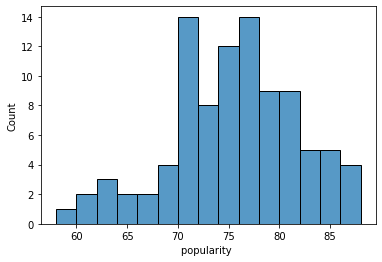

In [28]:
#I will also check the updated histogram to confirm my changes
fig, ax = plt.subplots()
sns.histplot(df_100['popularity '], bins=15, ax=ax)

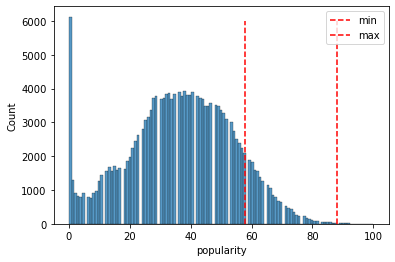

In [29]:
#I will also visualize the min and max popularity on the original,overall histogram, to show where these songs landon the popularity scale overall.
fig, ax = plt.subplots()
sns.histplot(df['popularity'], bins='auto', ax=ax)
ax.vlines(x=df_100['popularity '].min(), ymin=0, ymax=6000, linestyles='dashed', colors='red', label='min')
ax.vlines(x=df_100['popularity '].max(), ymin=0, ymax=6000, linestyles='dashed', colors='red', label='max')
plt.legend()

In [30]:
#So now that we have a better idea of where popualr songs may lie, we will be using 58, as the cut off/popularity threshold for spotify songs.
#A song will be deemed popular, if it is in the top 100, with 58 being our cut off/popularity threshold



In [31]:
#Now, I will be creating a column called is_popular with the new popularity threshold of 58
df['is_popular']=(df['popularity']>=58).astype('int')
df.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,...,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,is_popular
track_id,,,,,,,,,,,,,,,,,,,,,
00021Wy6AyMbLP2tqij86e,Capcom Sound Team,Zangief's Theme,13,0.234,0.617,169173,0.862,0.976000,G,0.1410,...,0,0,0,0,0,0,0,0,0,0
000CzNKC8PEt1yC3L8dqwV,Henri Salvador,Coeur Brisé à Prendre - Remastered,5,0.249,0.518,130653,0.805,0.000000,F,0.3330,...,0,0,0,0,0,0,0,0,0,0
000DfZJww8KiixTKuk9usJ,Mike Love,Earthlings,30,0.366,0.631,357573,0.513,0.000004,D,0.1090,...,1,0,0,0,0,0,0,0,0,0
000EWWBkYaREzsBplYjUag,Don Philippe,Fewerdolr,39,0.815,0.768,104924,0.137,0.922000,C#,0.1130,...,0,0,1,0,0,0,0,0,0,0
000xQL6tZNLJzIrtIgxqSl,ZAYN,Still Got Time,70,0.131,0.748,188491,0.627,0.000000,G,0.0852,...,0,0,0,0,0,0,0,0,0,1


In [32]:
#Now that we have our new is_popular column, we can get rid of the other popularity column, as well as artist_name, track_name, because we are only looking at the ACTUAL song, and not who is involved in making it, which is important, because we want to see what songs may be popular from emerging and new artists, which is a big part of my business problem.
df.drop(['popularity', 'artist_name', 'track_name'], axis=1, inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,is_popular
track_id,,,,,,,,,,,,,,,,,,,,,
00021Wy6AyMbLP2tqij86e,0.234,0.617,169173,0.862,0.976000,G,0.1410,-12.855,Major,0.0514,...,0,0,0,0,0,0,0,0,0,0
000CzNKC8PEt1yC3L8dqwV,0.249,0.518,130653,0.805,0.000000,F,0.3330,-6.248,Major,0.0407,...,0,0,0,0,0,0,0,0,0,0
000DfZJww8KiixTKuk9usJ,0.366,0.631,357573,0.513,0.000004,D,0.1090,-6.376,Major,0.0293,...,1,0,0,0,0,0,0,0,0,0
000EWWBkYaREzsBplYjUag,0.815,0.768,104924,0.137,0.922000,C#,0.1130,-13.284,Minor,0.0747,...,0,0,1,0,0,0,0,0,0,0
000xQL6tZNLJzIrtIgxqSl,0.131,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,...,0,0,0,0,0,0,0,0,0,1


One last thing before creating models, is to ensure that the categorical columns (mainly key, mode, and time_signature) are taken care of, through noe hot encoding.


In [33]:
#Step 1: See how many columns will need to be created
df.nunique()

acousticness         4734
danceability         1295
duration_ms         70749
energy               2517
instrumentalness     5400
key                    12
liveness             1732
loudness            27923
mode                    2
speechiness          1641
tempo               78509
time_signature          5
valence              1692
Movie                   2
R&B                     2
A Capella               2
Alternative             2
Country                 2
Dance                   2
Electronic              2
Anime                   2
Folk                    2
Blues                   2
Opera                   2
Hip-Hop                 2
Children's Music        2
Rap                     2
Indie                   2
Classical               2
Pop                     2
Reggae                  2
Reggaeton               2
Jazz                    2
Rock                    2
Ska                     2
Comedy                  2
Soul                    2
Soundtrack              2
World       

In [34]:
#Based off of what we see above, we have to create about 16 columns. 
cat_cols = ['key', 'mode', 'time_signature']

In [35]:
#One hot encoding code:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False, drop='first')
data_ohe = encoder.fit_transform(df[cat_cols]) #X_train[cat_cols], swapping out
df_ohe = pd.DataFrame(data_ohe, columns=encoder.get_feature_names(cat_cols), index=df.index)

In [36]:
pd.set_option("display.max_columns", None)
df_ohe

,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
track_id,,,,,,,,,,,,,,,,
00021Wy6AyMbLP2tqij86e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
000CzNKC8PEt1yC3L8dqwV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
000DfZJww8KiixTKuk9usJ,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
000EWWBkYaREzsBplYjUag,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
000xQL6tZNLJzIrtIgxqSl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7zz7MbCb9G7KJc1NVl9bL0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7zzFNNxVD0h0ctAT08H0pa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7zzTeItz93lYI52hlcipm5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [37]:
#Finishing up the one hot encoded process
df_ohe = pd.concat([df.drop(cat_cols, axis=1), df_ohe], axis=1)
df_ohe.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,Opera,Hip-Hop,Children's Music,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,is_popular,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00021Wy6AyMbLP2tqij86e,0.234,0.617,169173,0.862,0.976000,0.1410,-12.855,0.0514,129.578,0.886,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
000CzNKC8PEt1yC3L8dqwV,0.249,0.518,130653,0.805,0.000000,0.3330,-6.248,0.0407,79.124,0.841,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
000DfZJww8KiixTKuk9usJ,0.366,0.631,357573,0.513,0.000004,0.1090,-6.376,0.0293,120.365,0.307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
000EWWBkYaREzsBplYjUag,0.815,0.768,104924,0.137,0.922000,0.1130,-13.284,0.0747,76.430,0.560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
000xQL6tZNLJzIrtIgxqSl,0.131,0.748,188491,0.627,0.000000,0.0852,-6.029,0.0644,120.963,0.524,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


MODELING: Baseline Model

In [38]:
#As a best practice, I am going to be splitting up the data into training and test sets so I can measure performance
from sklearn.model_selection import train_test_split
y=df_ohe['is_popular']
X=df_ohe.drop('is_popular',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
#MODEL 1: BASELINE , Dummy Classifier
#I am going to be using the dummy classifier as my baseline model, as a best practice.
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(random_state=42)
clf_dummy.fit(X_train, y_train)
y_pred = clf_dummy.predict(X_test)

C:\Users\lestrada\Anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [40]:
#Based off of online research, the easiest way to create a classification report, confusion matrix, and ROC curve would be through the following code.
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

def classification(y_true, y_pred, X, clf):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of model quality.
    
    y_true: Correct y values, typically y_test that comes from the train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X: X_test values"""
    
    #Classification report
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    #Creating a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    
    #Plotting the normalized confusion matrix
    plot_confusion_matrix(estimator=clf, X=X, y_true=y_true, cmap='Blues', normalize='true', ax=ax[0])
    
    #Plotting the ROC curve
    plot_roc_curve(estimator=clf, X=X, y=y_true, ax=ax[1])
    
    #Plotting the 50-50 guessing plot for reference
    ax[1].plot([0,1], [0,1], ls='--', color='orange')

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     47002
           1       0.11      0.11      0.11      6031

    accuracy                           0.80     53033
   macro avg       0.50      0.50      0.50     53033
weighted avg       0.80      0.80      0.80     53033



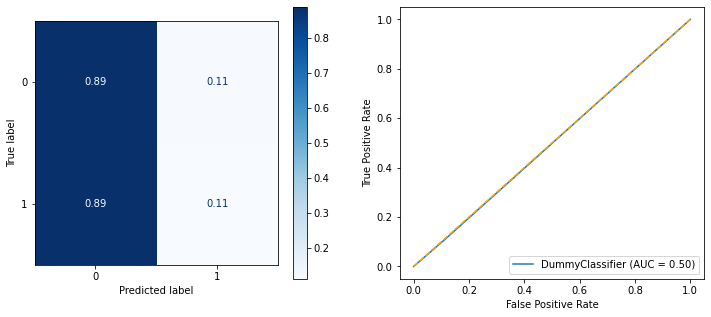

In [41]:
#Loading the classification report
classification(y_test, y_pred, X_test, clf_dummy)


In [42]:
#As a best practice, I am going to check the class imbalance %
y_train.value_counts(normalize=True)

0    0.885503
1    0.114497
Name: is_popular, dtype: float64

In [43]:
#As seen above, the dummy classifier correctly predicted around 89% of the unpopular songs as being unpopular, but it also correctly predicted 11% of the popular songs as popular, and also classified 89% of those popular songs as unpopular, which is a big class imbalance issue.
#The main problem right now is 89% of our data is seen as not popular, and only 11% IS
#Based off of research, the easiest way to deal with this is through doing something called SMOTE, specifically to the training data, so that we can see if the imbalance can be removed. 


In [44]:
#First step
#I am going to look at the column names in order to extract categorical column indices for SMOTENC
X.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'Movie', 'R&B', 'A Capella', 'Alternative', 'Country',
       'Dance', 'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children's Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor',
       'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',
       'time_signature_5/4'],
      dtype='object')

In [45]:
#Next I am going to create a list of categorical column indices, based off of info from stack overflow
cat_cols = list(range(10, len(X.columns)))
X.columns[cat_cols]

Index(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children's Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor',
       'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',
       'time_signature_5/4'],
      dtype='object')

In [46]:
#Next I use SMOTENC to fix my class imbalance.

from imblearn.over_sampling import SMOTE, SMOTENC

sm = SMOTENC(categorical_features=cat_cols, random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
y_train_sm.value_counts(normalize=True)

1    0.5
0    0.5
Name: is_popular, dtype: float64

C:\Users\lestrada\Anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.50      0.64     47002
           1       0.12      0.51      0.19      6031

    accuracy                           0.50     53033
   macro avg       0.50      0.51      0.42     53033
weighted avg       0.80      0.50      0.59     53033



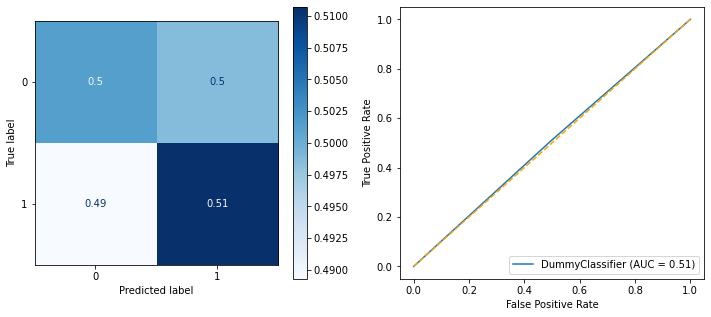

In [47]:
#As seen above, the class imbalance has been taken care of, so now we can see the updated dummy classifier to use as our baseline model
clf_dummy_sm = DummyClassifier(random_state=42)
clf_dummy_sm.fit(X_train_sm, y_train_sm)
y_pred = clf_dummy_sm.predict(X_test)
classification(y_test, y_pred, X_test, clf_dummy_sm)

As noted in my project proposal, we are going to be using Random Forests as part of our modeling
This model will help to decide on what songs are popular and what is not


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     47002
           1       0.75      0.59      0.66      6031

    accuracy                           0.93     53033
   macro avg       0.85      0.78      0.81     53033
weighted avg       0.93      0.93      0.93     53033



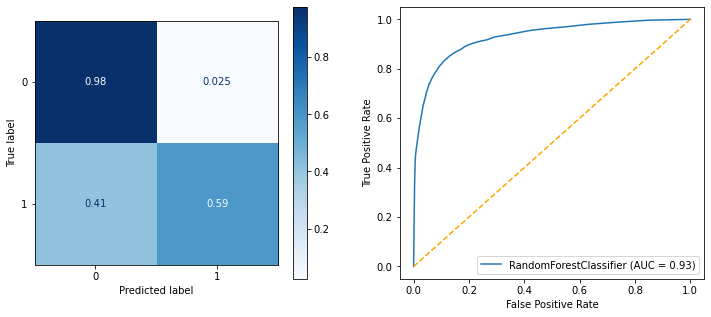

In [48]:
#Step 1 for the Random Forest Classifer
#I will need to fit this classifier to the previous set of data fixed above in our baseline model
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_sm, y_train_sm)

#I will include Prediction and evaluation in this block aswell
y_pred = clf_rf.predict(X_test)
classification(y_test, y_pred, X_test, clf_rf)

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    109573
           1       1.00      1.00      1.00    109573

    accuracy                           1.00    219146
   macro avg       1.00      1.00      1.00    219146
weighted avg       1.00      1.00      1.00    219146



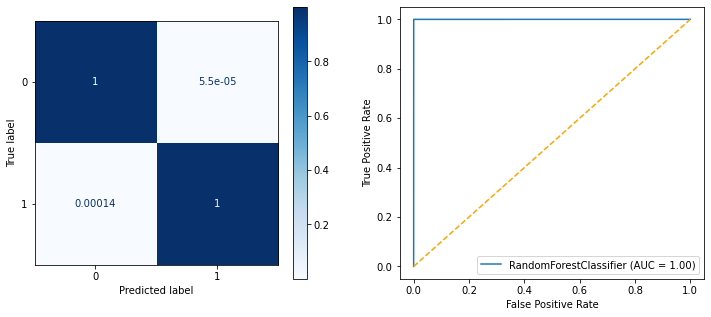

In [49]:
#As seen above, the random forest model performs about 48% better than our baseline classfier, in terms of correctly predicting unpopular songs, as well as being 9% better predicting popular songs
#I will check to see if the model is overfitting, so just to be safe, I will check this models performance with the training data
y_pred = clf_rf.predict(X_train_sm)
classification(y_train_sm, y_pred, X_train_sm, clf_rf)

In [52]:
#As seen above, the random forest model performs well on the training data, but not as much on the test data, because of overfitting.
#To fix this problem, I will have to tune the model, particularly, by doing hyperparameter tuning, which will be achieved through grid search
#The following code has been leveraged from stack overflow as It was a little confusing on how to achieve hyperparameter tuning
#from sklearn.model_selection import GridSearchCV

#clf = RandomForestClassifier()
#grid = {'criterion': ['gini', 'entropy'], 
         #'max_depth': [10, 20, None],
         #'min_samples_leaf': [1, 2, 3]
       # }

#gridsearch = GridSearchCV(estimator=clf, param_grid = grid, scoring='recall')

#gridsearch.fit(X_train_sm,  y_train_sm)
#gridsearch.best_params_
#Results: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2}
 

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     47002
           1       0.75      0.60      0.66      6031

    accuracy                           0.93     53033
   macro avg       0.85      0.79      0.81     53033
weighted avg       0.93      0.93      0.93     53033



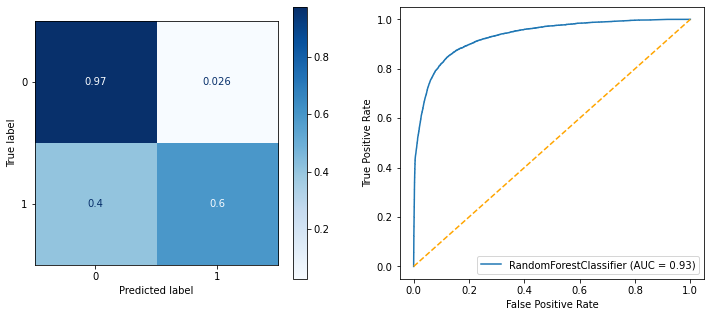

In [53]:
clf_rf_tuned = RandomForestClassifier(criterion='entropy', max_depth=None, 
                                      min_samples_leaf=2, class_weight='balanced', 
                                      random_state=42)
clf_rf_tuned.fit(X_train_sm, y_train_sm)

y_pred = clf_rf_tuned.predict(X_test)
classification(y_test, y_pred, X_test, clf_rf_tuned)

In [54]:
#Now my model has been improved a bit by the hyperparameter tuning 

MODEL 2: XG BOOST
Just for some variety, and to see if there are any drastic changes in prediction, I am also going to create an XGBoost model


CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     47002
           1       0.67      0.64      0.66      6031

    accuracy                           0.92     53033
   macro avg       0.81      0.80      0.81     53033
weighted avg       0.92      0.92      0.92     53033



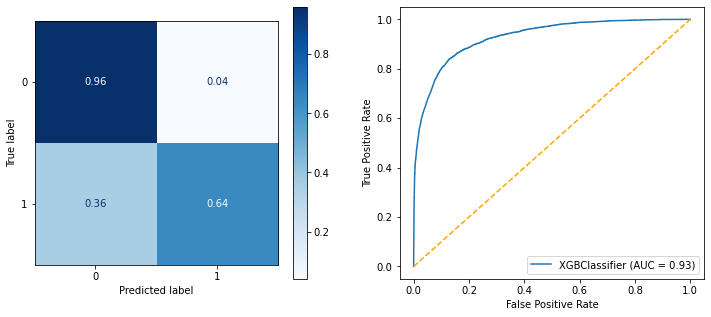

In [56]:
#First step in this process is fitting the XGBoost classifier to my training data, and then evaluating those results
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(random_state=42)
clf_xgb.fit(X_train_sm, y_train_sm)
y_pred = clf_xgb.predict(X_test)
classification(y_test, y_pred, X_test, clf_xgb)

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    109573
           1       0.97      0.96      0.96    109573

    accuracy                           0.96    219146
   macro avg       0.96      0.96      0.96    219146
weighted avg       0.96      0.96      0.96    219146



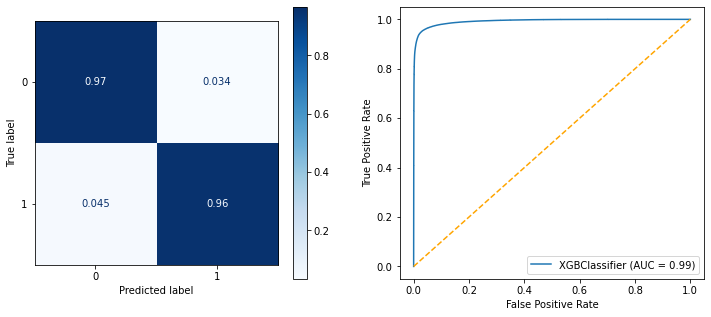

In [57]:
#As seen above, the XGBoost model did better than the baseline model by about 13%, and 4% better than the random forest model. 
#Just like before, I am also going to check to see how the model performs on the training data (to check for overfitting)
y_pred = clf_xgb.predict(X_train_sm)
classification(y_train_sm, y_pred, X_train_sm, clf_xgb)

In [ ]:
#Just like before in our random forest model, we see that the model is overfitting the training data
#And just like before, I am going to run another gridsearch to try and tune the model

In [60]:
#grid = {
   # 'learning_rate': [0.01, 0.1, 0.2],
  #  'max_depth': [10, 20, None]
      #   }
#gridsearch = GridSearchCV(estimator=clf_xgb, param_grid = grid, scoring='recall', n_jobs=-1, verbose=2)

#gridsearch.fit(X_train_sm,  y_train_sm)
#gridsearch.best_params_
#Results: {'learning_rate': 0.1, 'max_depth': 10}
#NOTE, This part of the code takes a VERY long time to load

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     47002
           1       0.66      0.65      0.66      6031

    accuracy                           0.92     53033
   macro avg       0.81      0.80      0.81     53033
weighted avg       0.92      0.92      0.92     53033



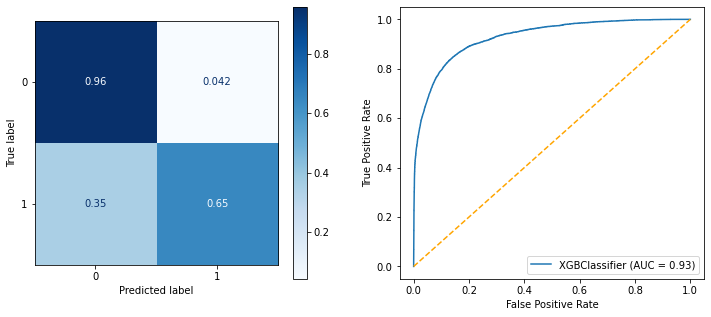

In [61]:
#Now i am going to check to see if it improved at all

clf_xgb_tuned = XGBClassifier(learning_rate=0.1, max_depth=10, 
                              random_state=42)
clf_xgb_tuned.fit(X_train_sm, y_train_sm)
y_pred = clf_xgb_tuned.predict(X_test)
classification(y_test, y_pred, X_test, clf_xgb_tuned)

In [ ]:
#As we can see above, we are performing 14% better compared to the baseline model, due to the 1% increase from the tuning.
#We also are running 5% better than random forest model.

Analyzing the Models (Random Forest)

In [55]:
#The first thing I am going to do, is parse the feature importances from the Random Forests to Dataframes
rf_importances_df = pd.Series(clf_rf_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
#parsing the series to a dataframe
rf_importances_df = rf_importances_df.reset_index()
rf_importances_df.columns = ['RF-Attribute', 'RF-Importance']
rf_importances_df


,RF-Attribute,RF-Importance
0,Pop,0.170450
1,acousticness,0.058465
2,loudness,0.042098
3,instrumentalness,0.035188
4,energy,0.030445
5,speechiness,0.027606
6,Reggae,0.025547
7,Ska,0.025070
8,danceability,0.024540
9,valence,0.023421


Analyzing the Models (Random Forest)

In [62]:
#The first thing I am going to do, is parse the feature importances to a series and sorting
xgb_importances_df = pd.Series(clf_xgb_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)



In [63]:
#The second thing I am going to do, is parse this series to a dataframe

xgb_importances_df = xgb_importances_df.reset_index()
xgb_importances_df.columns=['XGB-Attribute', 'XGB-Importance']
xgb_importances_df

,XGB-Attribute,XGB-Importance
0,Pop,0.338478
1,Blues,0.044411
2,Ska,0.041425
3,Anime,0.038448
4,Electronic,0.035823
5,key_F,0.030206
6,Reggae,0.028680
7,Reggaeton,0.028236
8,World,0.026180
9,Comedy,0.022677


The next big piece, is a feature importance comparison between the models

Pop is the biggest factor in song popularity in XGBOOST analysis

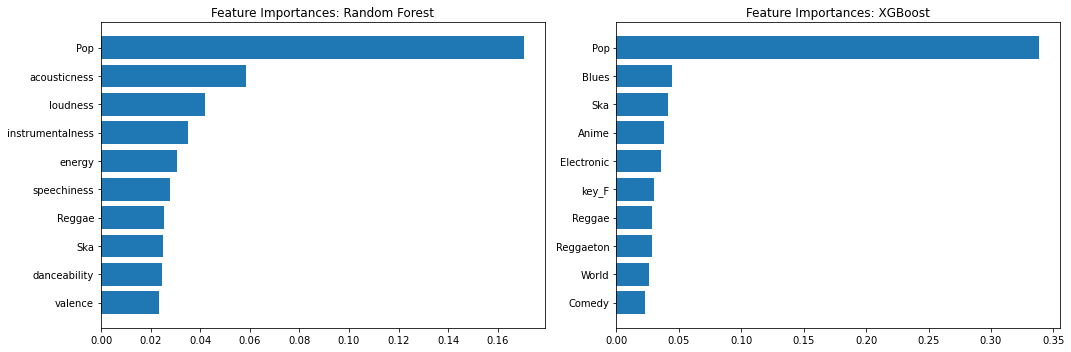

In [65]:
#Here, I am plotting the feature importances for both models (Random Forest and XGBoost)
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

rf_importances_df = rf_importances_df.sort_values(by='RF-Importance', ascending=True).tail(10)
ax[0].barh(rf_importances_df['RF-Attribute'], rf_importances_df['RF-Importance'])
ax[0].set_title('Feature Importances: Random Forest')

xgb_importances_df = xgb_importances_df.sort_values(by='XGB-Importance', ascending=True).tail(10)
ax[1].barh(xgb_importances_df['XGB-Attribute'], xgb_importances_df['XGB-Importance'])
ax[1].set_title('Feature Importances: XGBoost')
plt.tight_layout()

In [ ]:
#As we can see, between both of these models, it appears that genre has the highest effect on song popularity, which is good to know!
#Other features like energy, danceability, also play a part in song popularity, but definitely not to the same extent as genre

I am going to do a few data visulizations based off of our models to help come to some conclusions on what best predicts song popularity

In [66]:
#First I will look at Genre, but first, I will need to separate into popular and unpopular
popular_songs_df = df_ohe[df_ohe['is_popular'] == 1]
unpopular_songs_df = df_ohe[df_ohe['is_popular']==0]


In [67]:
#Second, I will see how many times a certain genre is in a popular song
popular_genre_df = popular_songs_df.iloc[:, 10:36].agg('sum').sort_values(ascending=False).reset_index()
popular_genre_df.columns = ['genre', 'count']
popular_genre_df

,genre,count
0,Pop,8845
1,Rap,5440
2,Rock,5332
3,Hip-Hop,4483
4,Dance,4151
5,Indie,3096
6,Children's Music,3079
7,Alternative,2713
8,R&B,2347
9,Folk,1658


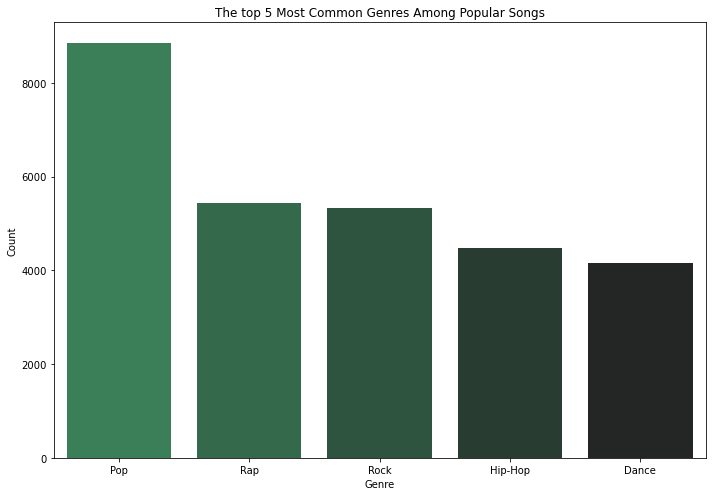

In [71]:
#Data visualization to go along with this:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=popular_genre_df['genre'].head(5), y=popular_genre_df['count'].head(5), 
           palette='dark:seagreen_r')

ax=plt.gca()
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('The top 5 Most Common Genres Among Popular Songs')
plt.tight_layout();
plt.savefig('genre-popular.jpg')

In [76]:
#As seen in an earlier output, it is clear that Pop is the most popualr genre among the popluar songs, which makes sense, and is essentially common knowledge.

#So, one part of the overall conclusion, is that popular songs tend to be more mainstream, like Pop, Rap, Rock, Hip-Hop, and Dance!

In [73]:
#Now we will do the same thing for unpopular songs, first checking for how many times a certain genre is in unpopular songs

unpopular_genre_df = unpopular_songs_df.iloc[:, 10:36].agg('sum').sort_values(ascending=False).reset_index()
unpopular_genre_df.columns = ['genre', 'count']
unpopular_genre_df

,genre,count
0,Children's Music,11677
1,Comedy,9680
2,Soundtrack,9544
3,Classical,9169
4,Jazz,9073
5,Electronic,9044
6,Anime,8901
7,World,8875
8,Ska,8754
9,Blues,8625


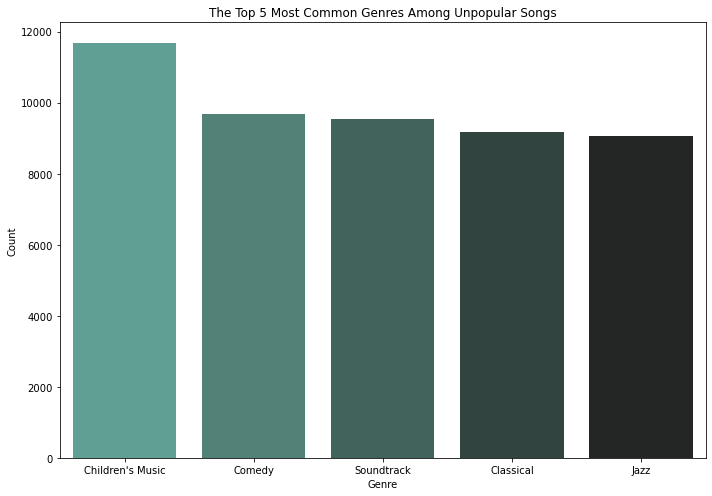

In [74]:
#Data visualization to go along with the above code:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=unpopular_genre_df['genre'].head(5), y=unpopular_genre_df['count'].head(5), 
           palette='dark:#5A9_r')

ax=plt.gca()
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
ax.set_title('The Top 5 Most Common Genres Among Unpopular Songs')
plt.tight_layout();
plt.savefig('genre-unpopular.jpg')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='center');

In [75]:
#As seen above, it appears that childrens music is the most unpopular genre among these other unpopular genres, which makes sense to anyone who has listened to the radio before.

#So, one part of the overall conclusion, is that unpopular songs tend to be more niche, like Children;s music, Comedy, Classical, and Jazz

While we now know what genre of songs are seen as the most popular, we cannot just rely on this to draw our conclusions, because genre isnt everything, as some songs in certain genres may be more popular than others, and not every song in the same genre performs the same on the charts. We need to look at other differentiating factors within genre, such as the energy a song may have, or their danceability, as these may impact a songs popularity massively.

In [77]:
#First, I will be taking a look at a Songs Energy, which will require a bit of cleaning to remove outliers, and separating them to a series for popular and unpopular songs
popular_energy_clean = popular_songs_df[find_outliers_IQR(popular_songs_df['energy'])==False]
print(popular_energy_clean['energy'].describe())

unpopular_energy_clean = unpopular_songs_df[find_outliers_IQR(unpopular_songs_df['energy'])==False]
print(unpopular_energy_clean['energy'].describe())

count    20040.000000
mean         0.642509
std          0.195809
min          0.074000
25%          0.511000
50%          0.662000
75%          0.796000
max          0.999000
Name: energy, dtype: float64
count    156575.000000
mean          0.546617
std           0.282264
min           0.000020
25%           0.318000
50%           0.578000
75%           0.788000
max           0.999000
Name: energy, dtype: float64


In [79]:
#I will be storing mean energy in dictionaries
mean_energy = {'popular': popular_energy_clean['energy'].mean(), 
                     'unpopular': unpopular_energy_clean['energy'].mean()}

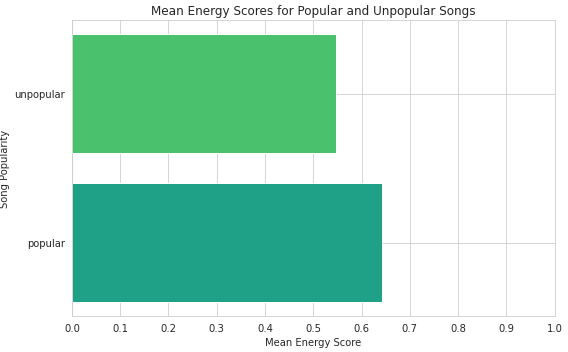

In [81]:
#Next, I will visualize the mean scores in a bar chart for easier readability
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(y=list(mean_energy.keys()), 
            width=list(mean_energy.values()), 
            color=[sns.color_palette('viridis')[3],sns.color_palette('viridis')[4]]) 
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_ylabel('Song Popularity')
    ax.set_xlabel('Mean Energy Score')
    ax.set_title('Mean Energy Scores for Popular and Unpopular Songs')
    plt.tight_layout()
    plt.savefig('energy.jpg')

In [82]:
#As seen above, songs that were more popular tend to have a higher energy score than those that do not.

#So, one part of the overall conclusion,songs that were more popular tend to have a higher energy score than those that do not. 

In [83]:
#Now, I will take a look at Danceability, as that is also an area that may impact a songs popularity heavily.
#I will start by seeing the Median of danceability scores

print('Median Danceability Scores')
print('-------------------')
print(f"Unpopular Songs: {round(unpopular_songs_df['danceability'].median(),2)}")
print(f"Popular Songs: {round(popular_songs_df['danceability'].median(),2)}")

Median Danceability Scores
-------------------
Unpopular Songs: 0.55
Popular Songs: 0.63


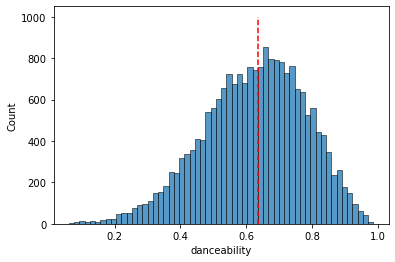

In [84]:
#I will then plot this on a histogram for easy viewing on the popular songs front
sns.histplot(data = popular_songs_df, x='danceability', bins='auto')
plt.vlines(x=popular_songs_df['danceability'].median(), ymin=0, ymax=1000, color='red', ls='--')

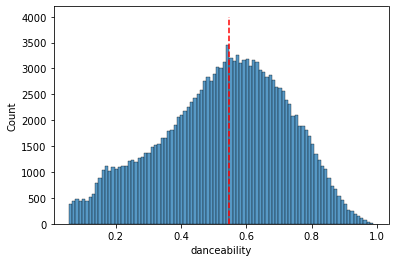

In [85]:
#I will also plot this on a histogram for easy viewing on the unpopular songs front
sns.histplot(data = unpopular_songs_df, x='danceability', bins='auto')
plt.vlines(x=unpopular_songs_df['danceability'].median(), ymin=0, ymax=4000, color='red', ls='--')

In [86]:
#Next, as we did before, I will be removing outliers from the danceability scores, and putting them into a series for popular and unpopular songs
popular_dance_clean = popular_songs_df[find_outliers_IQR(popular_songs_df['danceability'])==False]
print(popular_dance_clean['danceability'].describe())

unpopular_dance_clean = unpopular_songs_df[find_outliers_IQR(unpopular_songs_df['danceability'])==False]
print(unpopular_dance_clean['danceability'].describe())

count    20094.000000
mean         0.625974
std          0.151130
min          0.196000
25%          0.523000
50%          0.636000
75%          0.738000
max          0.985000
Name: danceability, dtype: float64
count    156575.000000
mean          0.530440
std           0.191956
min           0.056900
25%           0.401000
50%           0.547000
75%           0.674000
max           0.989000
Name: danceability, dtype: float64


In [87]:
#Next, I will store the mean danceability scores in a dictionary
mean_danceability = {'popular': popular_dance_clean['danceability'].mean(), 
                     'unpopular': unpopular_dance_clean['danceability'].mean()}

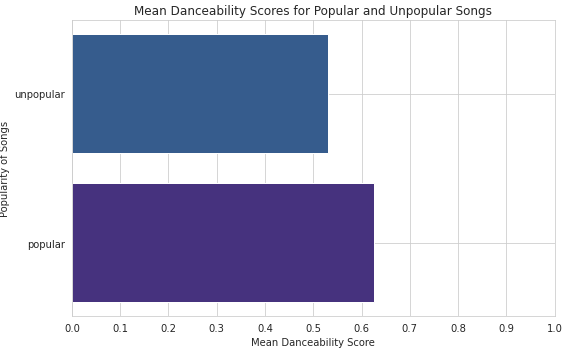

In [90]:
#Next, I will visualize the mean danceability scores
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(y=list(mean_danceability.keys()), 
            width=list(mean_danceability.values()), 
            color=[sns.color_palette('viridis')[0],sns.color_palette('viridis')[1]]) 
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0,1.1,0.1))
    ax.set_ylabel('Popularity of Songs')
    ax.set_xlabel('Mean Danceability Score')
    ax.set_title('Mean Danceability Scores for Popular and Unpopular Songs')
    plt.tight_layout();
    plt.savefig('danceability.jpg')

In [91]:
#As seen above, it appears that songs that tend to be popular, also tend to be more danceable, which is good to know for our song prediction!

##So, one part of the overall conclusion, songs that tend to be popular, also tend to be more danceable, which is good to know for our song prediction!

OVERALL CONCLUSION

After analyzing over 176,000 songs from spotify after data cleanup, I have come to a few conclusions that will hopefully help aid businesses involved in the music industry make better decisions when deciding what songs to put in to their curated playlists to attract more listeners/audience to their respective business and business type (publication, record label, radio station):

1. Most songs that are considered popular, are from Pop, Rap, Rock, Hip Hop, and Dance genres
2. Most songs that are considered unpopualr, are from genres such as Children's msuic, Comedy, Soundtracks, Classical, and Jazz
3. Most Popular songs, tend to be more danceable, and have higher energy!

So, with this information in mind, music related businesses can thrive on creating the most popular, and listenable playlists, to attract more customers to their business!